#PW ASSIGNMENT
#STATISTICS ADVANCED-1


## Question 1: What is a random variable in probability theory?

**Answer:**
A **random variable** is a function that assigns a real number to each outcome of a random experiment. It maps outcomes from a sample space to the real line, allowing us to quantify uncertainty and apply algebra/calculus to probabilistic phenomena.

---

## Question 2: What are the types of random variables?

**Answer:**

1. **Discrete random variable:** Takes values from a countable set (e.g., 0, 1, 2, …). Probabilities are described by a **probability mass function (pmf)**.
2. **Continuous random variable:** Takes values from an uncountable continuum (e.g., any real number in an interval). Probabilities are described by a **probability density function (pdf)**, and probabilities are computed over intervals (areas under the curve).

*(Some practical problems involve **mixed** random variables that have both discrete and continuous components.)*

---

## Question 3: Explain the difference between discrete and continuous distributions.

**Answer:**

* **Support:** Discrete distributions have countable support (e.g., integers), while continuous distributions have intervals of real numbers as support.
* **Probability assignment:** Discrete uses a **pmf** with $P(X=x)$; Continuous uses a **pdf** $f(x)$ where $P(a\le X\le b)=\int_a^b f(x)\,dx$ and $P(X=x)=0$.
* **Cumulative distribution:** Both use a **cdf** $F(x)=P(X\le x)$; in continuous cases, $f(x)=F'(x)$ where differentiable.
* **Examples:** Discrete—Bernoulli, Binomial, Poisson. Continuous—Uniform, Normal, Exponential.

---

## Question 4: What is a binomial distribution, and how is it used in probability?

**Answer:**
A **Binomial($n,p$)** distribution models the number of successes in $n$ independent Bernoulli trials, each with success probability $p$. Its pmf is

$$
P(X=k)=\binom{n}{k} p^k (1-p)^{n-k},\quad k=0,1,\dots,n.
$$

It is used when trials are independent, have two outcomes (success/failure), and a constant success probability. Key properties: $\mathbb{E}[X]=np$, $\mathrm{Var}(X)=np(1-p)$.

---

## Question 5: What is the standard normal distribution, and why is it important?

**Answer:**
The **standard normal distribution** is the Normal(0, 1) distribution with mean 0 and variance 1. It is important because:

* Any normal variable can be standardized via **z-scores**: $Z=(X-\mu)/\sigma$.
* Many statistics (e.g., sample means for large $n$) are approximately normal by the CLT.
* Critical values and p-values in many tests are tabulated for the standard normal.

---

## Question 6: What is the Central Limit Theorem (CLT), and why is it critical in statistics?

**Answer:**
The **CLT** states that for i.i.d. random variables with finite mean $\mu$ and variance $\sigma^2$, the distribution of the standardized sample mean
$Z = \frac{\bar X - \mu}{\sigma/\sqrt{n}}$
converges to the standard normal as $n \to \infty$. It is critical because it justifies using normal-based inference (confidence intervals, hypothesis tests) for sample means even when the underlying data are not normal, provided the sample size is sufficiently large or the distribution is not too heavy-tailed.

---

## Question 7: What is the significance of confidence intervals in statistical analysis?

**Answer:**
A **confidence interval (CI)** provides a range of plausible values for a population parameter (e.g., mean) based on sample data. A 95% CI, constructed by a correct procedure, will contain the true parameter in 95% of repeated samples. CIs quantify estimation uncertainty, are more informative than point estimates alone, and reflect sample variability and chosen confidence level.

---

## Question 8: What is the concept of expected value in a probability distribution?

**Answer:**
The **expected value** (mean) of a random variable $X$ is the long-run average outcome: for discrete $X$, $\mathbb{E}[X]=\sum_x x\,P(X=x)$; for continuous $X$, $\mathbb{E}[X]=\int_{-\infty}^{\infty} x f(x)\,dx$. Expected value is linear: $\mathbb{E}[aX+bY]=a\mathbb{E}[X]+b\mathbb{E}[Y]$, which is fundamental in modeling and decision-making.

---



Question 9: Write a Python program to generate 1000 random numbers from a normal
distribution with mean = 50 and standard deviation = 5. Compute its mean and standard
deviation using NumPy, and draw a histogram to visualize the distribution.


Sample mean: 50.097
Sample std (ddof=1): 4.896


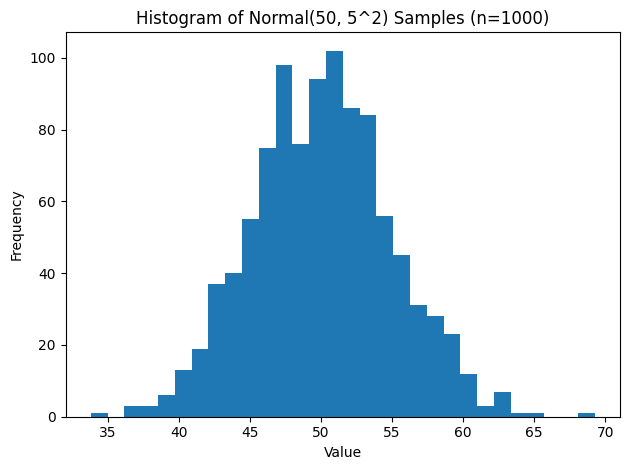

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
# Generate 1000 samples from Normal(mean=50, sd=5)
data = np.random.normal(loc=50, scale=5, size=1000)

# Sample statistics
sample_mean = data.mean()
sample_std = data.std(ddof=1)  # unbiased (n-1)
print(f"Sample mean: {sample_mean:.3f}")
print(f"Sample std (ddof=1): {sample_std:.3f}")

# Histogram
plt.figure()
plt.hist(data, bins=30)
plt.title('Histogram of Normal(50, 5^2) Samples (n=1000)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Question 10: You are working as a data analyst for a retail company. The company has
collected daily sales data for 2 years and wants you to identify the overall sales trend.

daily_sales = [220, 245, 210, 265, 230, 250, 260, 275, 240, 255,
 235, 260, 245, 250, 225, 270, 265, 255, 250, 260]

● Explain how you would apply the Central Limit Theorem to estimate the average sales with a 95% confidence interval.

● Write the Python code to compute the mean sales and its confidence interval.

In [2]:
import numpy as np
from math import sqrt

sales = np.array([220, 245, 210, 265, 230, 250, 260, 275, 240, 255,
                  235, 260, 245, 250, 225, 270, 265, 255, 250, 260])

n = len(sales)
mean_sales = sales.mean()
std_sales = sales.std(ddof=1)
se = std_sales / sqrt(n)

# t critical value for 95% CI with df=n-1
try:
    from scipy import stats
    tcrit = stats.t.ppf(0.975, df=n-1)
except Exception:
    tcrit = 2.093  # approx for df=19

ci_lower = mean_sales - tcrit * se
ci_upper = mean_sales + tcrit * se

print(f"Mean sales: {mean_sales:.3f}")
print(f"Sample std (ddof=1): {std_sales:.3f}")
print(f"95% CI for mean: [{ci_lower:.3f}, {ci_upper:.3f}]")

Mean sales: 248.250
Sample std (ddof=1): 17.265
95% CI for mean: [240.170, 256.330]




### Applying the Central Limit Theorem (CLT) to Estimate the Average Sales with a 95% Confidence Interval

The **Central Limit Theorem (CLT)** states that if we take a sufficiently large random sample from any population with finite mean (μ) and variance (σ²), the distribution of the sample mean (\\( \bar{X} \\)) will be approximately normal, regardless of the shape of the population distribution.

In our case, we have 20 days of sales data. Using CLT:

1. **Population Assumption:**
   We treat the daily sales as independent and identically distributed (i.i.d.) random variables with an unknown true mean μ and variance σ².

2. **Sample Mean:**
   The best estimate of the population mean is the **sample mean**:
   \\\[ \bar{X} = \frac{1}{n} \sum\_{i=1}^n X\_i \\]

3. **Sample Standard Error (SE):**
   Since we only have a sample, the **standard error** of the mean is:
   \\\[ SE = \frac{s}{\sqrt{n}} \\]
   where \\( s \\) is the sample standard deviation.

4. **Confidence Interval (CI):**
   Because n=20 (not very large) and σ is unknown, we use the **t-distribution** with \\(n-1\\) degrees of freedom:
   \\\[ CI = \bar{X} \pm t\_{0.975, n-1} \times SE \\]


5. **Interpretation:**
   The 95% CI gives a range of values that, with 95% confidence, contains the **true average daily sales** for the company.

---

#THANK YOU